<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для Data Science.
# Домашнее задание №2.

Загрузим датасет о ценах на дома в Бостоне. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


Каждый дом - это вектор в 13-мерном пространстве. 
Написать код для подсчета скалярного произведения двух первых домов из датасета.

In [35]:
x1 = boston.data[10] # дом 1
x2 = boston.data[20] # дом 2

In [36]:
np.dot(x1,x2)

253432.39464898309

Нарисовать два дома в 3-мерном пространстве (атрибуты выбрать самостоятельно)

In [37]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [38]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

In [39]:
df_1 = df[['CRIM','B','PTRATIO']]
df_1 = df_1.dropna()

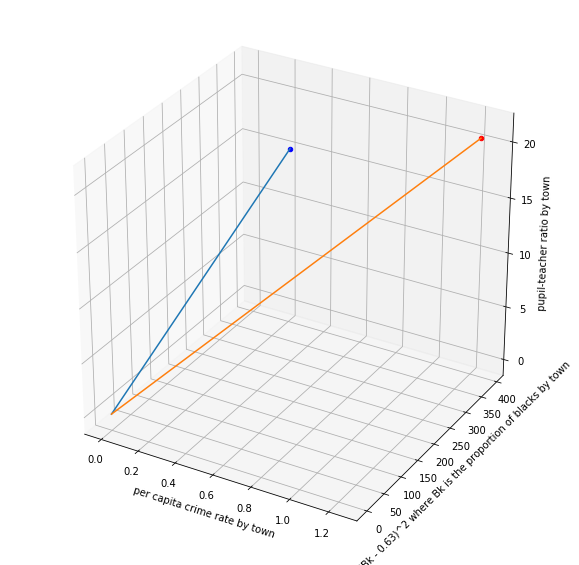

In [43]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

x = np.array(df_1['CRIM'])
y = np.array(df_1['B'])
z = np.array(df_1['PTRATIO'])

ax.plot([0,x[10]], [0,y[10]], [0,z[10]])
ax.plot([0,x[20]], [0,y[20]], [0,z[20]])

ax.scatter(x[10], y[10], z[10], c='b')
ax.scatter(x[20], y[20], z[20], c='r')

ax.set_xlabel('per capita crime rate by town')
ax.set_ylabel('1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town')
ax.set_zlabel('pupil-teacher ratio by town')
plt.show()



Найти косинус угла между векторами x1 и x2

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
x11 = x1.reshape(1,13)
x22 = x2.reshape(1,13)
cos_lib = cosine_similarity(x11, x22)
print(cos_lib)

[[0.99942427]]


Найти расстояние между точками x1 и x2.

In [49]:
from scipy.spatial import distance

distance.euclidean(x1,x2)

22.00755892983135

In [52]:
np.linalg.norm(x1-x2)

22.00755892983135

# Задание повышенного уровня.

Задан объект в пространстве 2D. 
Изменить положение объекта (сместить по оси x на 300 пикселей, по оси y на 200 пикселей).

(-200, 400)

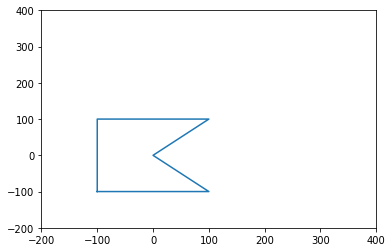

In [63]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [-100, -100, 1],
    [-100, 100, 1],
    [100, 100, 1],
    [0, 0, 1],
    [100, -100, 1],
    [-100, -100, 1]
    ]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 400])
plt.xlim([-200, 400])

(-200, 500)

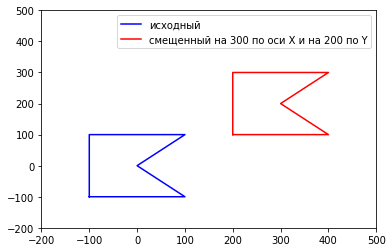

In [86]:
C = np.array(A) + [300, 200, 0]

A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, c='b')

C = np.array(C)
x2 = C[:,0]
y2 = C[:,1]
plt.plot(x2, y2, c ='r')
plt.legend(['исходный','смещенный на 300 по оси X и на 200 по Y'])


plt.ylim([-200, 500])
plt.xlim([-200, 500])

Уменьшить объект в два раза.

In [87]:
TransformArray = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 1]
])

In [88]:
B = np.transpose(np.dot(TransformArray,np.transpose(A)))

(-200, 400)

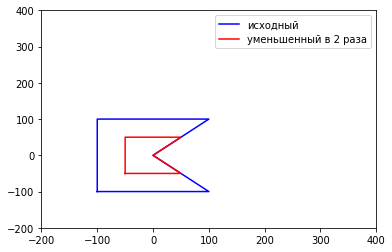

In [89]:
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, c='b')

B = np.array(B)
x2 = B[:,0]
y2 = B[:,1]
plt.plot(x2, y2, c ='r')
plt.legend(['исходный','уменьшенный в 2 раза'])

plt.ylim([-200, 400])
plt.xlim([-200, 400])

Повернуть на 130 градусов.

In [90]:
from math import cos, sin, pi

theta = 130 * 180/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])

(-200, 400)

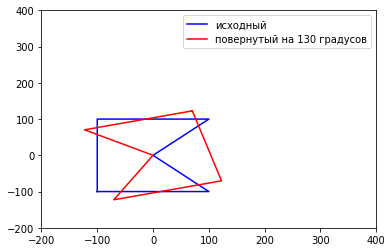

In [91]:
B = np.transpose(np.dot(TransformArray,np.transpose(A)))

A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, c='b')

B = np.array(B)
x2 = B[:,0]
y2 = B[:,1]
plt.plot(x2, y2, c ='r')
plt.legend(['исходный','повернутый на 130 градусов'])

plt.ylim([-200, 400])
plt.xlim([-200, 400])

Отразить объект относительно прямой y=x

In [124]:
TransformArray = np.array([[-1, 0, 0],
                           [0, -1, 0],
                           [0, 0, 1]])

(-200, 300)

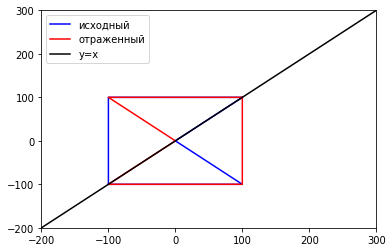

In [134]:
B = np.transpose(np.dot(TransformArray,np.transpose(A)))

A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, c='b')

B = np.array(B)
x2 = B[:,0]
y2 = B[:,1]
plt.plot(x2, y2, c ='r')

x3 = np.linspace(-200,400,100)
y3 = [x3[i] for i in range(len(x3))]
plt.plot(x3, y3, c ='black')

plt.legend(['исходный','отраженный','y=x'])

plt.ylim([-200, 300])
plt.xlim([-200, 300])